## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

Before making any predictive model using Machine Learning algorithms, understanding the data is crucial step to initiate your research with. And in the realm of data, Exploratory Data Analysis (EDA) is the most effective analytical strategy for discovering important and distinctive patterns in the dataset. Moreover, It can be used to detect outliers or any anomolies our dataset might have. 

Correlation Analysis and Regression Analysis are other methods that could assist in our understanding of many relationships in our dataset. Correlation Analysis would help us uncovering the interdependencies between variables.

Therefore, I would take EDA, and correlation analysis into consideration to analyze the dataset. And to train the ML model which can be used to predict the wine quality, I would implement multivariable linear regression, Support Vector Machine and Random Forest algorithms.

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

Flavor, colour, smell, and taste are the elements we may use to differentiate red wines based on quality. However, because ML models find it challenging to interpret these traits, we will focus on the chemical properties and measurements of the chemical substances needed to make red wine. Numerical data would help us in making better predictions about the quality of red wine than categorical data. 

### Data Collection

**Q3. From where do we get our data?**

We can get this data from the UCI machine learning repository (https://archive.ics.uci.edu/ml/datasets/wine+quality).

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

The red wine samples are obtained from the north of Portugal which are available on the UCI machine learning repository (https://archive.ics.uci.edu/ml/datasets/wine+quality).

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

Knowing the impact of each variable on the red wine quality will help producers improve the red wine quality, hence will lead to increment in the sale. Product quality certificates are now being used by industry companies to market their products. This is a time-consuming procedure that also requires skilled human evaluation, which drives up the cost, whereas ML models can be cost-effective and time-saving. 


### Data Preparation

#### Explore the dataset further

<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

___________________________________________________________________________________________________________

### Performing Exploratory Data Analysis, and Correlation Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

from sklearn.linear_model import LinearRegression 

In [2]:
#Loading the dataset
rw= pd.read_csv('winequality-red.csv')
rw.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
#Number of rows and columns 
rw.shape

(1599, 12)

Our dataset has 1599 rows and 12 columns

In [4]:
#Display the general information of the dataset
rw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Checking if the dataset has missing values

In [5]:
#Checking if our dataset has any null values
rw.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Dataset does not have any null values. 

In [6]:
#Checking central tendencies of different features of the red wine
rw.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

From the above-mentioned information, we can clearly notice that density of the wine is not deviating much (referred std) and remains constant throughout every quarter (referred 25%,50%,75%). The mean, min value of the same are also very close to quarter results. Hence, density is not affecting the quality of red wine significantly. So dropping density...

In [7]:
rw.drop(labels='density', axis=1, inplace=True)

In [8]:
print(rw.columns) #Confirming that the density column in dropped
rw.shape

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')


(1599, 11)

### Checking if our dataset has any outliers and handling them if needed

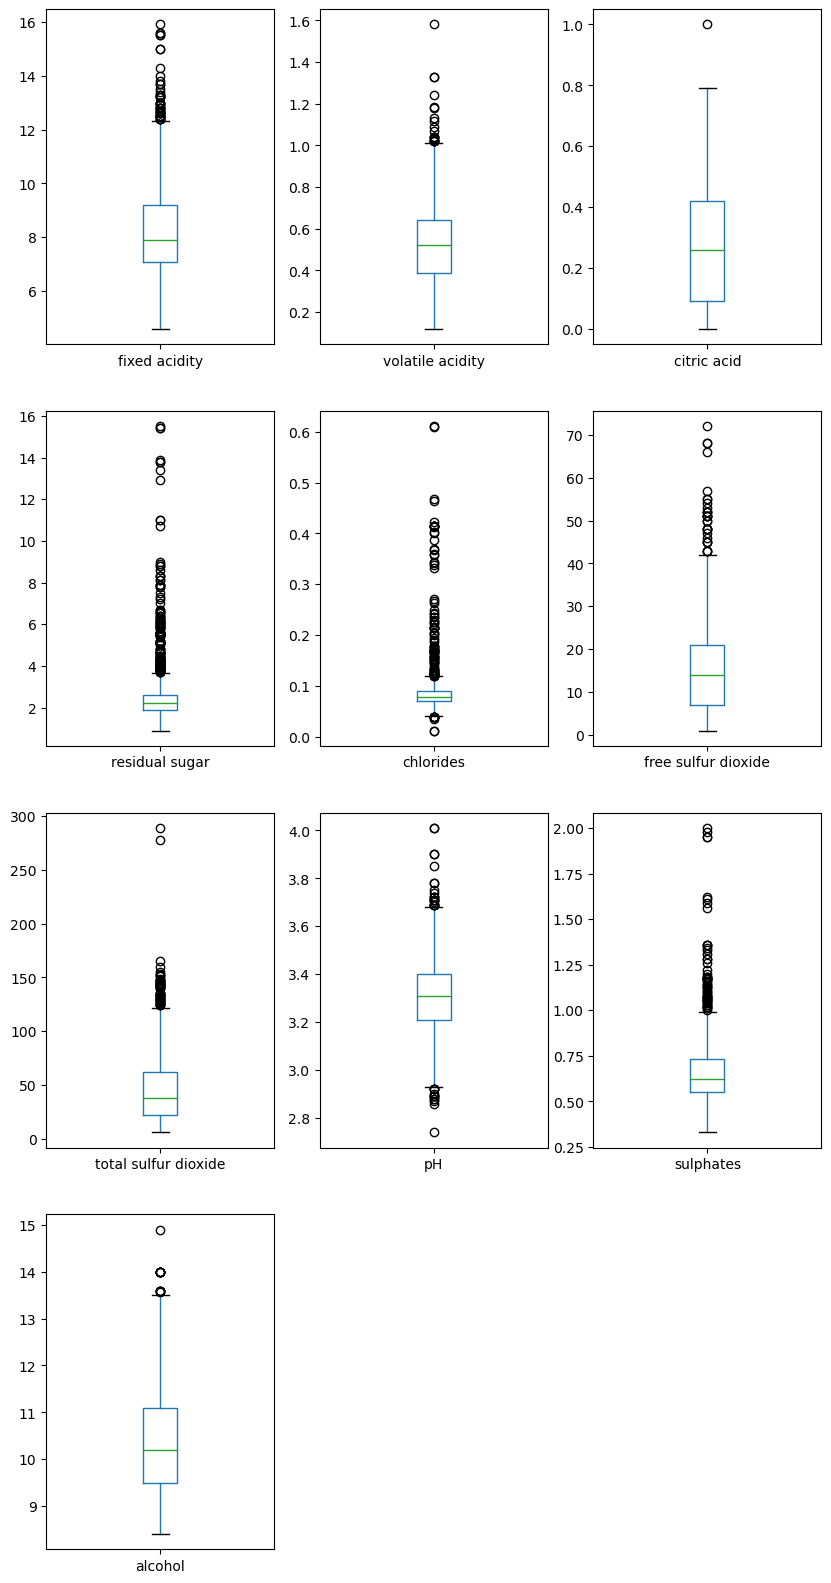

In [9]:
plt.figure(figsize=(10,20))

for i, col in enumerate(list(rw.columns.values)):
    if col=='quality':
        continue
    plt.subplot(4,3,i+1) 
    rw.boxplot(col)
    plt.grid()

We can clearly notice that every feature has outliers at some extent but removing them might impact our predictive model in such a way that our model could not predict accurate results as some wine may contain specific amount of chemicals which makes it exceptional. Hence, I am not removing outliers.

### Checking the distribution of data using histograms

Let's check whether the data is normally distributed or not.

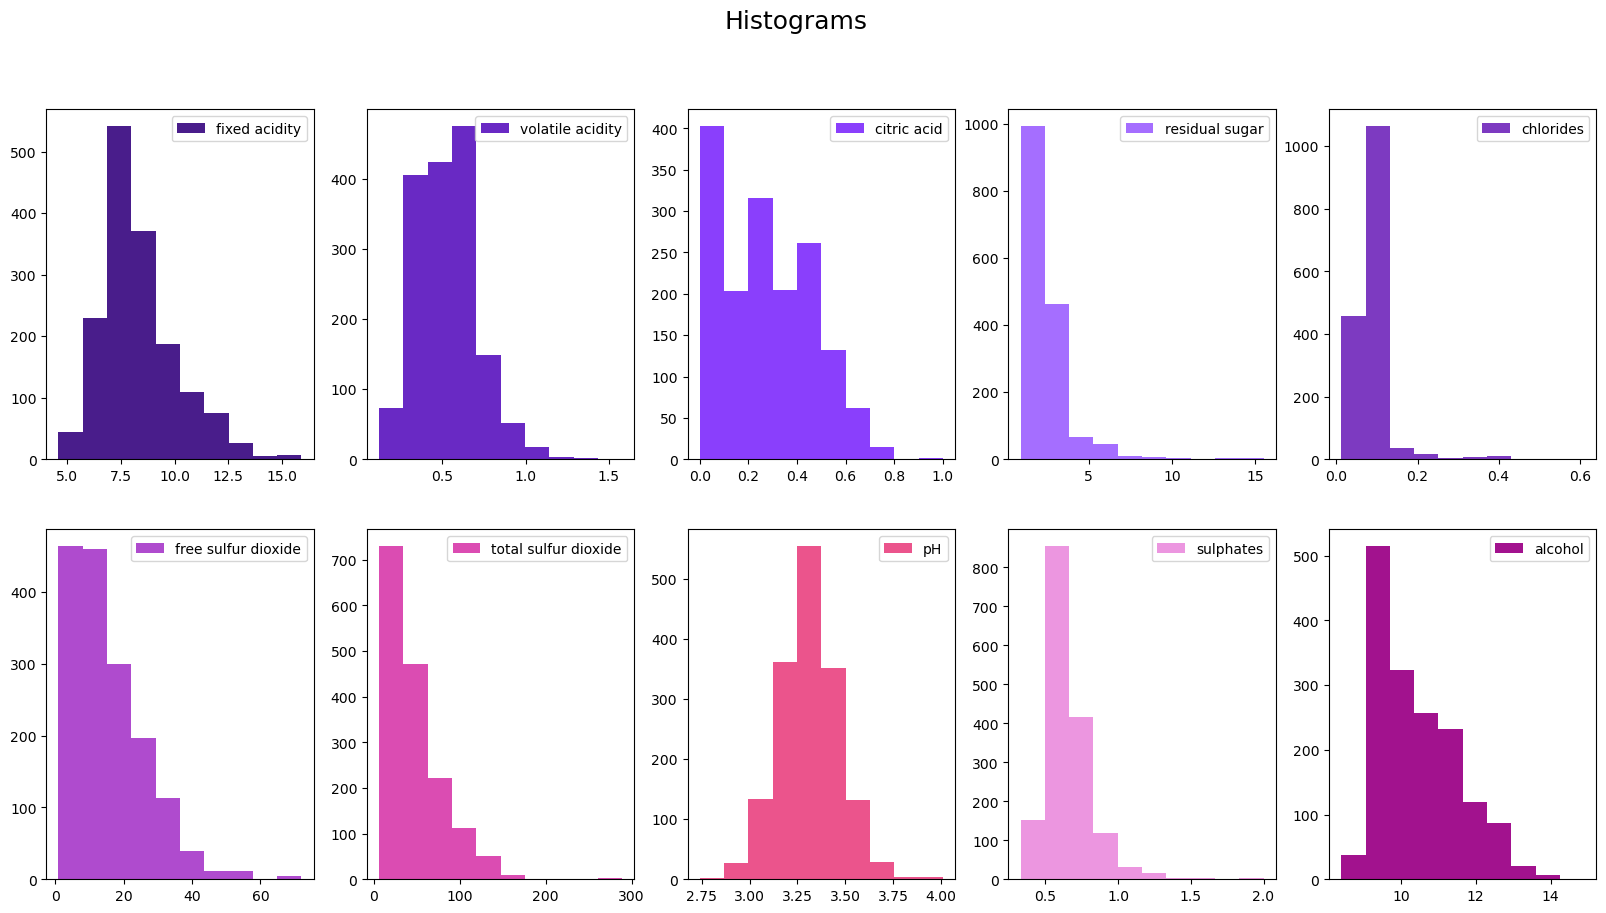

In [10]:
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (20, 10))

colors = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

for index, column in enumerate(rw.columns):
    if column== 'quality':
        continue
    ax = axes.flatten()[index]
    ax.hist(rw[column], color = colors[index], label = column)
    ax.legend(loc = "best")
plt.suptitle("Histograms", size = 18)

plt.show()

From, above displayed graphs, we can see how data is distributed.

The figures show that the "pH" values are normally distributed. While the data in all other columns is skewed to the left.

### Correlation Analysis

In [11]:
sns.pairplot(rw, hue = "quality", height = 10, aspect = 1.2, corner = True);

From the above drawn pairplot, we can spot multicollinearity, hence it is hard to make decision about how the relation between two independent variables can contribute towards the quality of red wine.

<function matplotlib.pyplot.show(close=None, block=None)>

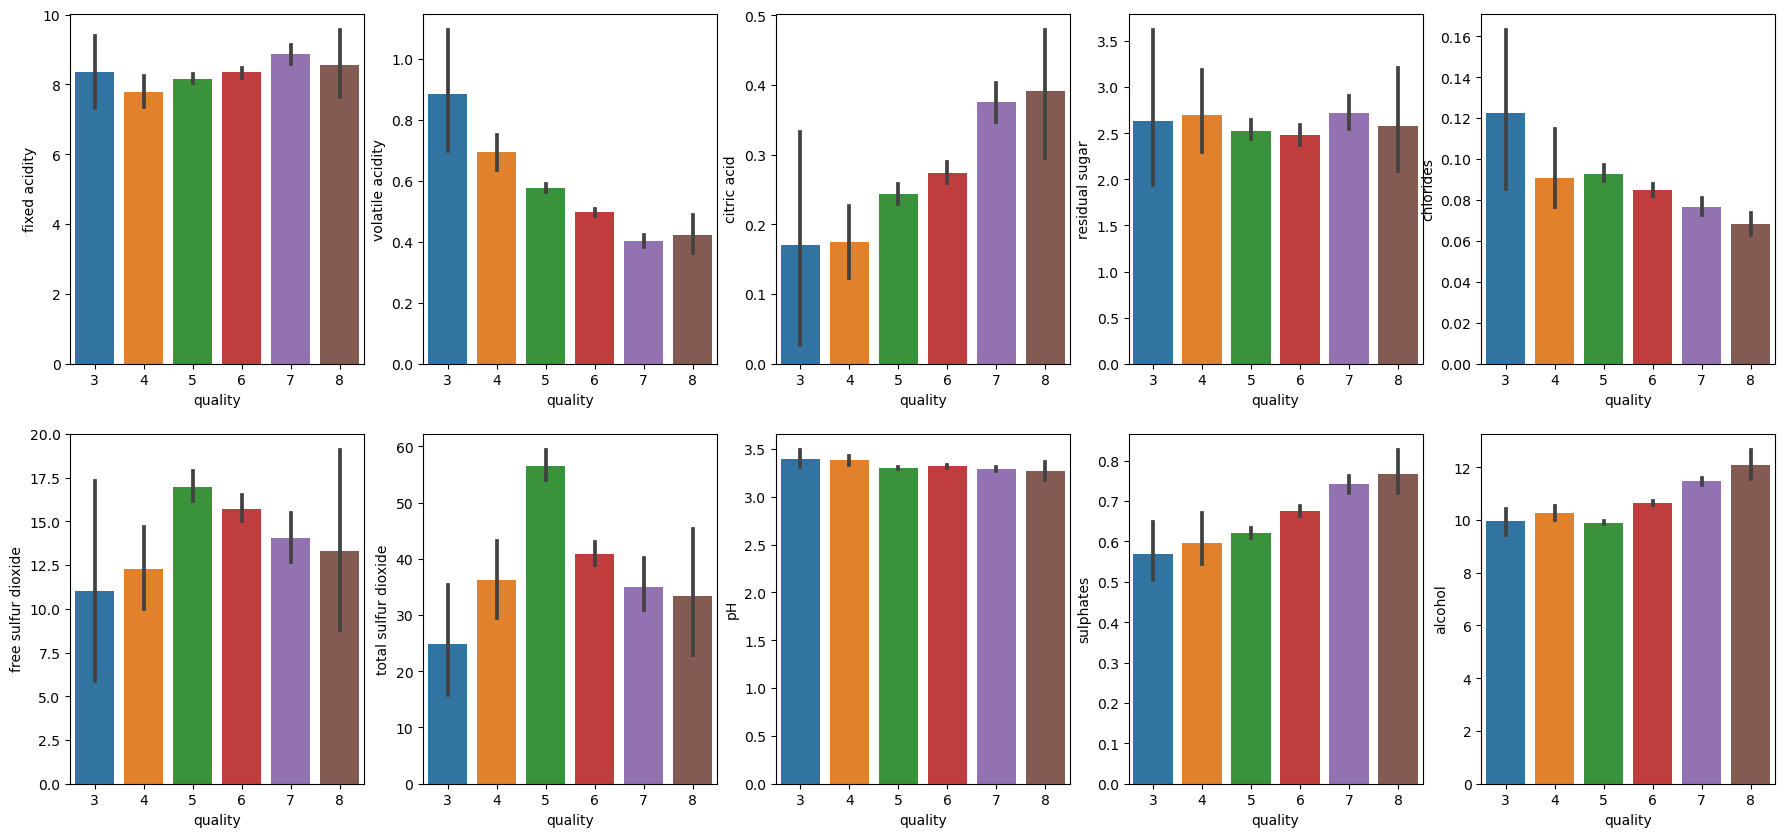

<Figure size 1000x2000 with 0 Axes>

In [12]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(22, 10))
ax = ax.flatten()
index=0
plt.figure(figsize=(10,20))

for i in rw.columns:
    if i == 'quality':
        continue
    sns.barplot(x='quality', y=i, data=rw, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show


From the above drawn graphs, we can infer following points-
 1. 'fixed acidity', 'residual sugar', 'free sulfur dioxide', and 'total sulfur dioxide' are behaving unusual as the quality of     red wine changes. Hence, considering them to predict the quality would not contribute positively. 
 
 
 2. Quality increases when-
     - volatile acidity decreases.
     - citric acid increases.
     - chlorides decreases.
     - pH decreases.
     - sulphates increases.
     - alcohol increases. 


### Implementing correlation heatmap

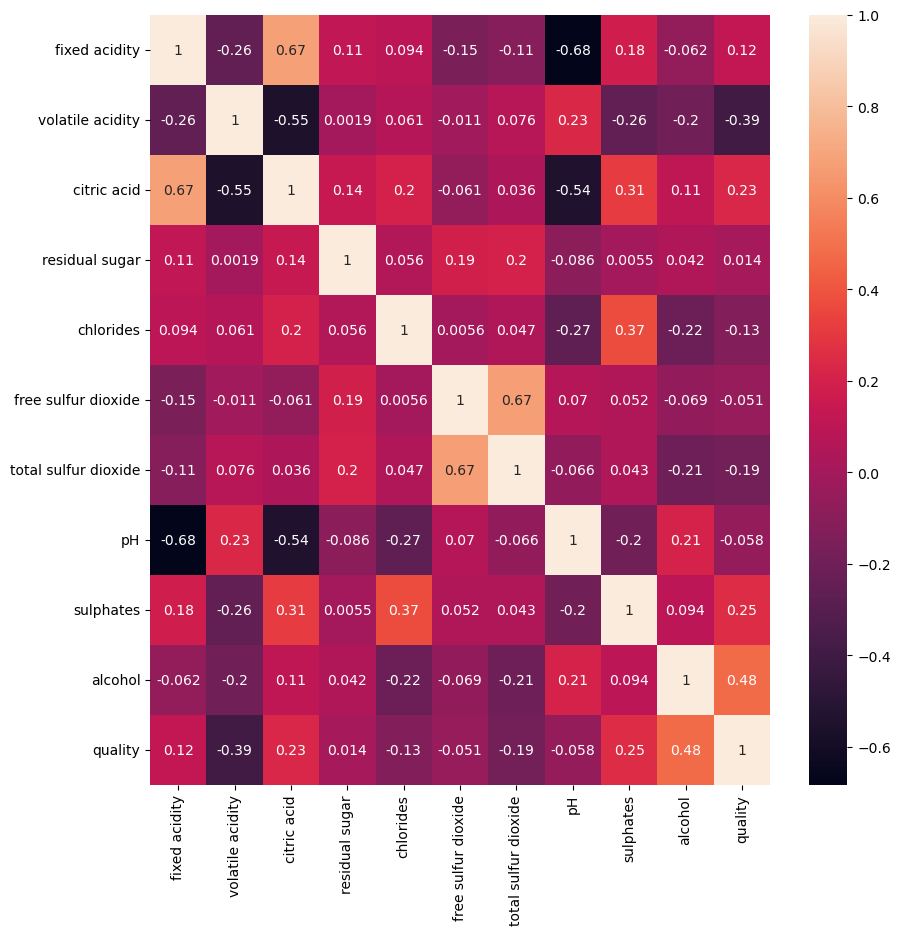

Correlation of different features of our dataset with quality:
fixed acidity : 0.1241
volatile acidity : -0.3906
citric acid : 0.2264
residual sugar : 0.0137
chlorides : -0.1289
free sulfur dioxide : -0.0507
total sulfur dioxide : -0.1851
pH : -0.0577
sulphates : 0.2514
alcohol : 0.4762


In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(rw.corr(method= 'pearson'), color = "k", annot=True)
plt.show()

print('Correlation of different features of our dataset with quality:')
for i in rw.columns:
    if i=='quality':
        continue
    corr, _ = pearsonr(rw[i], rw['quality'])
    print('%s : %.4f' %(i,corr))

From the above-mentioned results, we can confirm our previous results-

   1. 'volatile acidity','chlorides','pH' are negatively correlated with quality.
    
   2. Other features do not significant correlation with quality, but that does not mean that we will drop those features as they might be the best contributor factors for high quality wine.
   
Hence, I am not taking any additional steps to prepare the data for modelling.

_________________________________________________________________________
### Preparing the data for data modeling

Splitting the quality into two values.
If the quality is under 6 then considering it 0 else 1

In [14]:
rw['new_quality'] = [0 if x < 6 else 1 for x in rw['quality']]
rw.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide    pH  sulphates  alcohol  \
0                 11.0                  34.0  3.51       0.56      9.4   
1                 25.0                  67.0  3.20       0.68      9.8   
2                 15.0                  54.0  3.26       0.65      9.8   
3                 17.0                  60.0  3.16       0.58      9.8   
4                 11.0                  34.0  3.51       0.56      9.4   

   quality  new_quality  
0        5            0  
1        5            0  
2        5            0  
3        6            1  
4        5            0

_____________________________________________________________

## Modeling & Evaluation

<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>

### 1. Multiple Linear Regression

In [15]:
#Splitting the data into features and label. X to be features and y to be label.

x=rw.iloc[:, :-1]
y=rw.iloc[:, -1]

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25, random_state=5)

Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
# Train model on whole dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

#Predicting Test Set Results
y_pred = regressor.predict(x_test)

In [19]:
#Model evaluation of Multiple Linear Regression 

from sklearn import metrics

mae_lr = metrics.mean_absolute_error(y_test, y_pred)
mse_lr = metrics.mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae_lr)  
print('Mean Squared Error:', mse_lr)  
print('Root Mean Squared Error:', rmse_lr)

Mean Absolute Error: 0.2444856314227248
Mean Squared Error: 0.0702779104033571
Root Mean Squared Error: 0.26509981215262507


In [20]:
from sklearn.metrics import r2_score
r2_lr = r2_score(y_test,y_pred)
r2_lr

0.7184378589609091

### 2. Support Vector Machine

In [21]:
x2 = rw.iloc[:, :-1].values
y2 = rw.iloc[:, -1].values

#split
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2,test_size = 0.25, random_state = 5)


In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

In [23]:
from sklearn.svm import SVR
regressor2 = SVR(kernel='rbf')
regressor2.fit(x_train2,y_train2) # replace by x_train , y_train if we split

y_pred2= regressor2.predict(x_test2)

In [24]:
#Model evaluation of SVM Regression 

from sklearn import metrics

mae_svm = metrics.mean_absolute_error(y_test2, y_pred2)
mse_svm = metrics.mean_squared_error(y_test2, y_pred2)
rmse_svm = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))

print('Mean Absolute Error:', mae_svm)  
print('Mean Squared Error:', mse_svm)  
print('Root Mean Squared Error:', rmse_svm)

Mean Absolute Error: 0.10215056254690172
Mean Squared Error: 0.014905580032050537
Root Mean Squared Error: 0.12208841071965242


In [25]:
from sklearn.metrics import r2_score
r2_svm = r2_score(y_test2,y_pred2)
r2_svm

0.9402821312818488

### 3. Random Forest

In [26]:
# Assign
x3 = rw.iloc[:, :-1].values
y3 = rw.iloc[:, -1].values

In [27]:
# Split
from sklearn.model_selection import train_test_split
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3,y3,test_size = 0.25, random_state = 5)

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train3 = sc.fit_transform(x_train3)
x_test3 = sc.transform(x_test3)

In [29]:
from sklearn.ensemble import RandomForestRegressor
regressor3 = RandomForestRegressor(n_estimators = 5, max_features = 'sqrt', max_depth = 4, random_state=5)
regressor3.fit(x_train3,y_train3) # replace by x_train , y_train if we split

y_pred3= regressor3.predict(x_test3)


In [30]:
#Model evaluation of Random Forest 

from sklearn import metrics

mae_rf = metrics.mean_absolute_error(y_test3, y_pred3)
mse_rf = metrics.mean_squared_error(y_test3, y_pred3)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test3, y_pred3))

print('Mean Absolute Error:', mae_rf)  
print('Mean Squared Error:', mse_rf)  
print('Root Mean Squared Error:', rmse_rf)

Mean Absolute Error: 0.1293555955899886
Mean Squared Error: 0.02833262036419808
Root Mean Squared Error: 0.1683229644587989


In [31]:
from sklearn.metrics import r2_score
r2_rf = r2_score(y_test3,y_pred3)
r2_rf

0.8864878991818987

### Comparison of the performances of two algorithms.

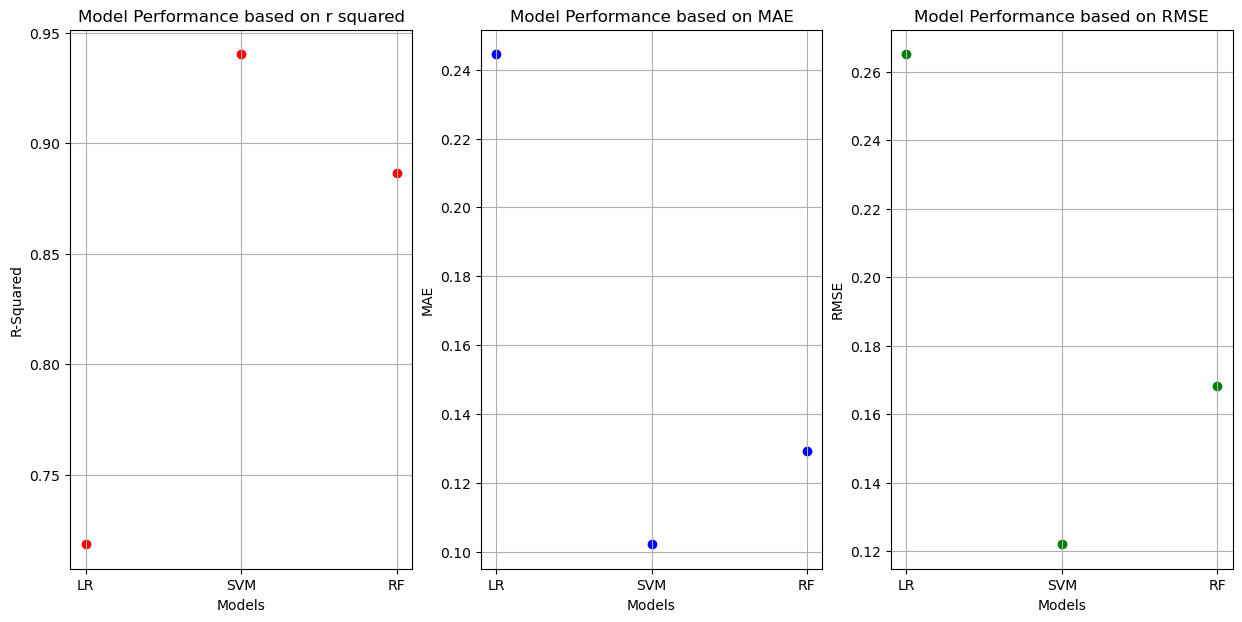

In [32]:
from matplotlib import pyplot as plt

models = ['LR', 'SVM', 'RF']
r2_models = [r2_lr, r2_svm, r2_rf]
mae_models = [mae_lr, mae_svm, mae_rf]
rmse_models = [rmse_lr, rmse_svm, rmse_rf]

fig = plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1) # row 1, col 2 index 1
plt.scatter(models, r2_models, color= 'red')
plt.grid()
plt.title("Model Performance based on r squared")
plt.xlabel('Models')
plt.ylabel('R-Squared')

plt.subplot(1, 3, 2) # index 2
plt.scatter(models, mae_models, color = 'Blue')
plt.grid()
plt.title("Model Performance based on MAE")
plt.xlabel('Models')
plt.ylabel('MAE')

plt.subplot(1, 3, 3) # index 3
plt.scatter(models, rmse_models, color = 'Green')
plt.grid()
plt.title("Model Performance based on RMSE")
plt.xlabel('Models')
plt.ylabel('RMSE')

plt.show()

Comparing two regression algorithms, we can notice that MAE,MSE, and RMSE of Support Vector Machine are lower than the MAE,MSE, and RMSE of Random Forest. Moreover, R-squared of Support Vector Machine is comparatively higher than the R-squared of Random Forest. Hence, We can say that SVM is performing better than Random Forest in this condition. 

___________________________________________________________________________________________

### Feature Importance

Feature: fixed acidity, Score: 0.01209
Feature: volatile acidity, Score: 0.00462
Feature: citric acid, Score: -0.01992
Feature: residual sugar, Score: -0.00539
Feature: chlorides, Score: 0.00367
Feature: free sulfur dioxide, Score: 0.02301
Feature: total sulfur dioxide, Score: -0.05075
Feature: pH, Score: 0.01480
Feature: sulphates, Score: 0.00874
Feature: alcohol, Score: 0.01115


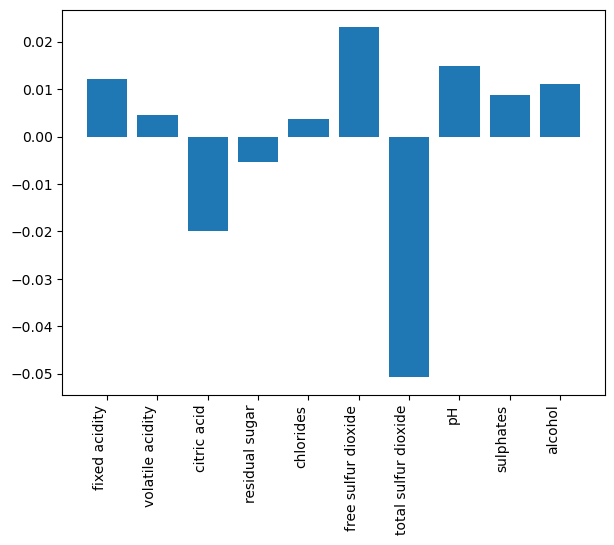

In [33]:
import matplotlib.pyplot as pyplot

#Feature Importance of Multiple Linear Regression

importance = regressor.coef_

# summarize feature importance
importance = importance[0:-1]
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (rw.columns[i],v))
    
# plot feature importance
columns = rw.columns.tolist()[:-2]
fig = plt.figure(figsize=(7,5))
pyplot.bar(columns, importance)
plt.xticks(range(10), columns, rotation=90, ha='right')

pyplot.show()

Feature: fixed acidity Score: 0.004
Feature: volatile acidity Score: 0.033
Feature: citric acid Score: 0.0
Feature: residual sugar Score: 0.01
Feature: chlorides Score: 0.001
Feature: free sulfur dioxide Score: 0.009
Feature: total sulfur dioxide Score: 0.06
Feature: pH Score: 0.003
Feature: sulphates Score: 0.118
Feature: alcohol Score: 0.104


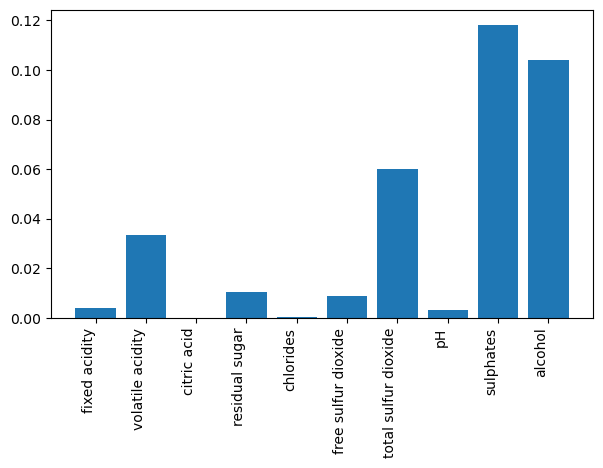

In [34]:
#Feature Importance of Random Forest

importance = regressor3.feature_importances_
importance = importance[0:-1]

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: '+format(rw.columns[i])+' Score: '+format(round(v,3)))
    
# plot feature importance
columns = rw.columns.tolist()[:-2]

pyplot.rcParams["figure.figsize"] = (7,4)
pyplot.bar(columns, importance)
plt.xticks(range(10), columns, rotation=90, ha='right')

pyplot.show()

When using the RBF kernel in SVM, the separation plane is created in a different space as a result of the original space being transformed by the kernel. Its coefficients don't always depend on the input space. The altered space is infinitely dimensional for the RBF kernel. Consequently, it is difficult to identify the important features of RBF Kernel SVM.

### Conclusion

To summarize, SVM model has done better job so far, however we have spotted one limitation of it which is that we cannot visualize the feature importance for SVM, so we cannot make analysis-driven decision on the business. (i.e., We cannot say which ingredients should be used in which amount to improve the wine quality). Therefore, we can cosider the second better option which is Random Forest.  

Given the ratio of ingredients, our machine learning algorithm can now estimate the quality of red wine. Using these models, we can improve the quality of wine so does our sales in the business. 